In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The pearson correlation coefficients of the variables are: 
               sepal_length  sepal_width
sepal_length       1.00000     -0.11757
sepal_width       -0.11757      1.00000


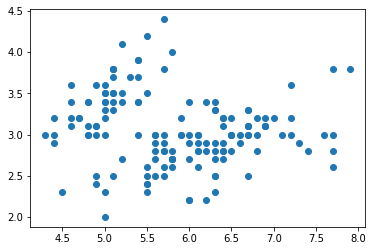

Visualization of Correlation Matrix as follows 
               sepal_length  sepal_width
sepal_length       1.00000     -0.11757
sepal_width       -0.11757      1.00000


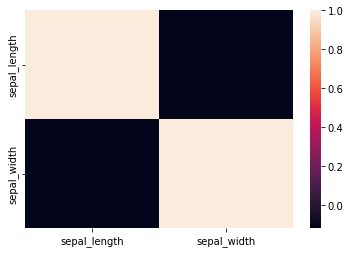

Z-Score of the dataset 
       sepal_length  sepal_width  petal_length  petal_width
0       -0.897674     1.015602     -1.335752    -1.311052
1       -1.139200    -0.131539     -1.335752    -1.311052
2       -1.380727     0.327318     -1.392399    -1.311052
3       -1.501490     0.097889     -1.279104    -1.311052
4       -1.018437     1.245030     -1.335752    -1.311052
..            ...          ...           ...          ...
145      1.034539    -0.131539      0.816859     1.443994
146      0.551486    -1.278680      0.703564     0.919223
147      0.793012    -0.131539      0.816859     1.050416
148      0.430722     0.786174      0.930154     1.443994
149      0.068433    -0.131539      0.760211     0.788031

[150 rows x 4 columns]
For the dataset the covariance matrix is 
 [[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]
Covari

In [65]:
dataset = pd.read_csv("iris.csv")
dataset.head()
correlation = define_corr('sepal_length','sepal_width')
print("The pearson correlation coefficients of the variables are: \n",correlation)
garph = plot_grap(dataset['sepal_length'],dataset['sepal_width'])
cor_matrix = vis_cor('sepal_length','sepal_width')
zs_standard = calc_zscore(dataset)
print("Z-Score of the dataset \n ",zs_standard)
covarinace_m = calc_covmat(zs_standard)
print("For the dataset the covariance matrix is \n",covarinace_m)
eigen = eg_val_vec(covarinace_m)
print("Covariance matrix for Eigen Values \n",eigen[0])
print("Covariance matrix for Eigen Vectors \n",eigen[1])

In [3]:
def define_corr(varx,vary):
    new_dataset = dataset[[varx,vary]].dropna()
    return new_dataset.corr()

In [18]:
def plot_grap(varx,vary):
    plt.scatter(varx,vary) 
    plt.show()
    

In [31]:
def vis_cor(varx,vary):
    new_dataset = dataset[[varx,vary]].dropna()
    cor_matrix = new_dataset.corr()
    print('Visualization of Correlation Matrix as follows \n',cor_matrix)
    sns.heatmap(cor_matrix)
    plt.show()

In [64]:
def calc_zscore(dataset):
    dataset = dataset.dropna()
    zdata = dataset.select_dtypes(float)
    zdf = (zdata-zdata.mean())/(zdata.std())
    return zdf
#     data = data.select_dtypes(float)
#     data_z = data.to_numpy()
#     data_z_np = (data_z - np.mean(data_z, axis=0)) / np.std(data_z, axis=0)
#     data_z_np_df = pd.DataFrame(data_z_np,index=data.index,columns=data.columns)
#     return data_z_np_df

In [59]:
def calc_covmat(zs_standard):
    covarinace_m = np.cov(zs_standard.T)
    return covarinace_m

In [47]:
def eg_val_vec(covarinace_m):
    egvalues, egvectors = np.linalg.eig(covarinace_m)
    return [egvalues,egvectors]